In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-additional-full-1.csv',sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [5]:
data.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

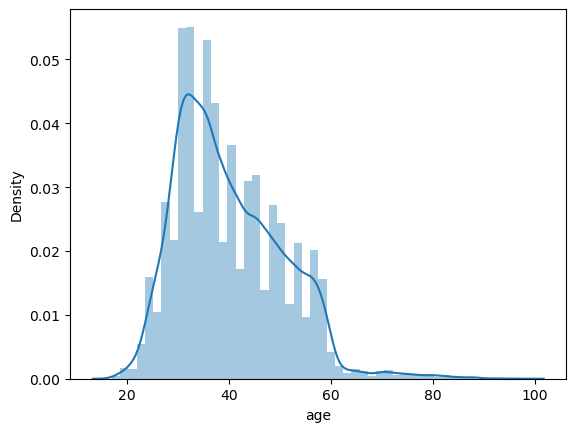

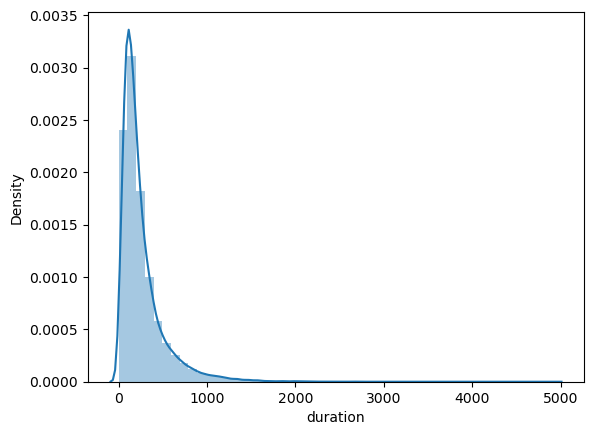

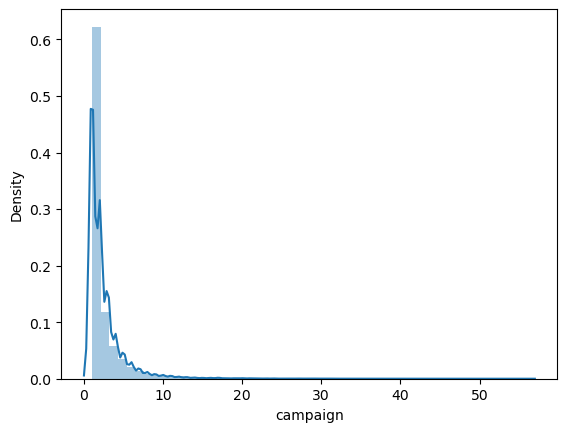

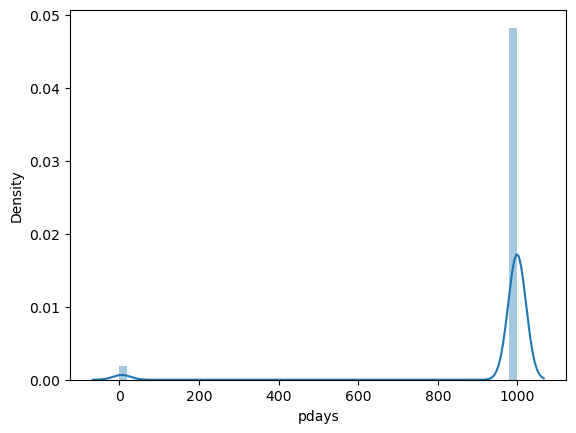

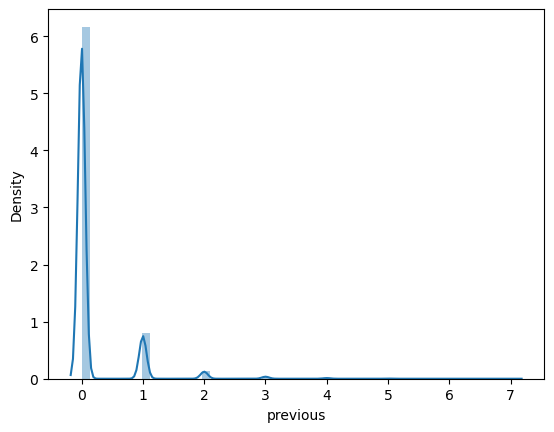

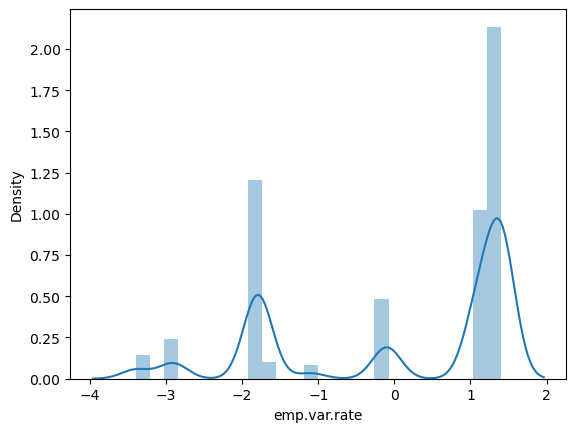

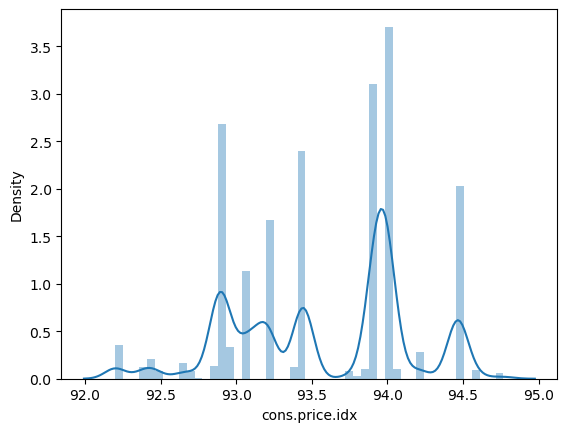

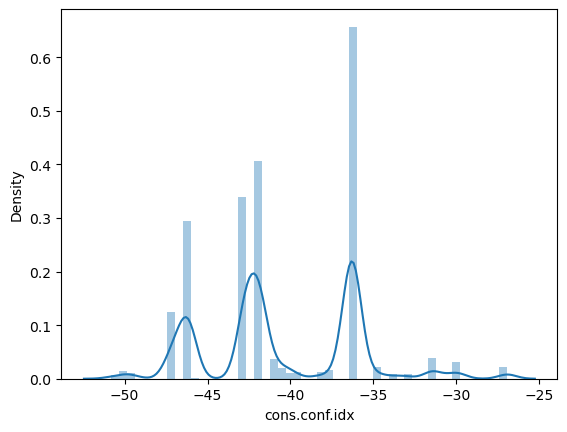

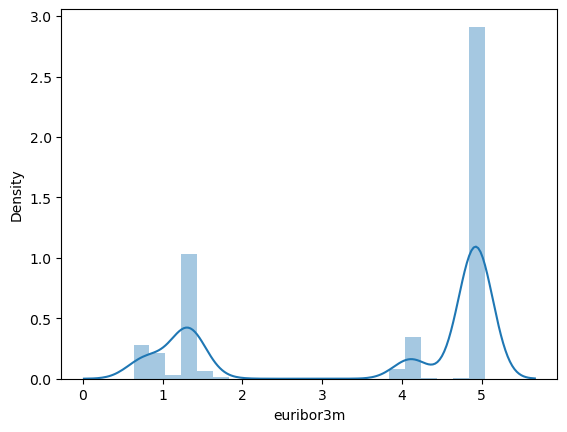

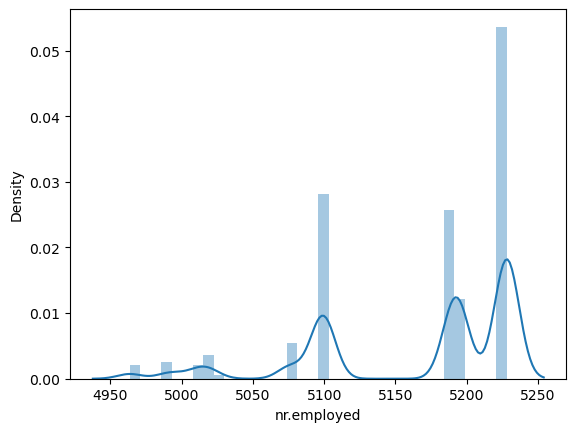

In [6]:
for i in data.columns:   
   if data[i].dtypes != 'object':
    sns.distplot(data[i])
    plt.xlabel(i)
    plt.show()

In [7]:
for i in data.columns:   
   if data[i].dtypes != 'object':
    data[i] = data[i].fillna(data[i].median())
   else:
    data[i] = data[i].fillna(data[i].mode()[0])

In [8]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

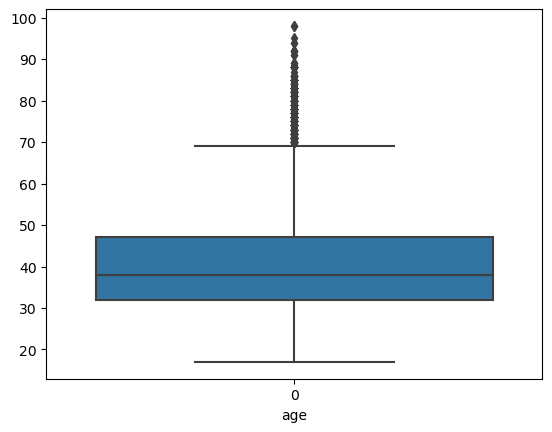

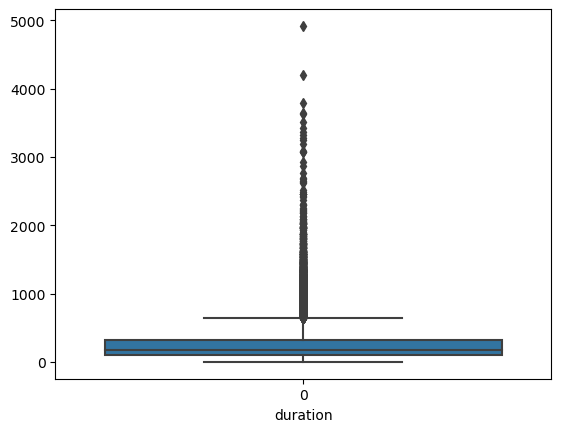

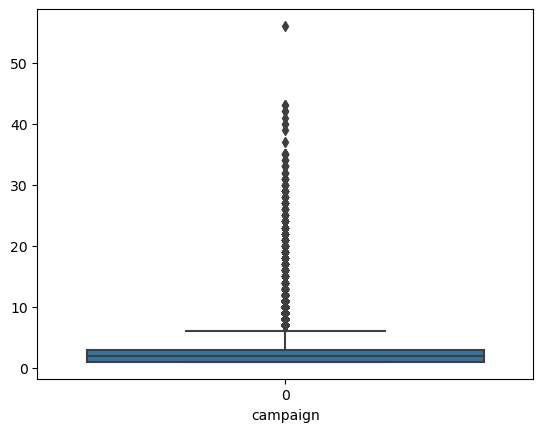

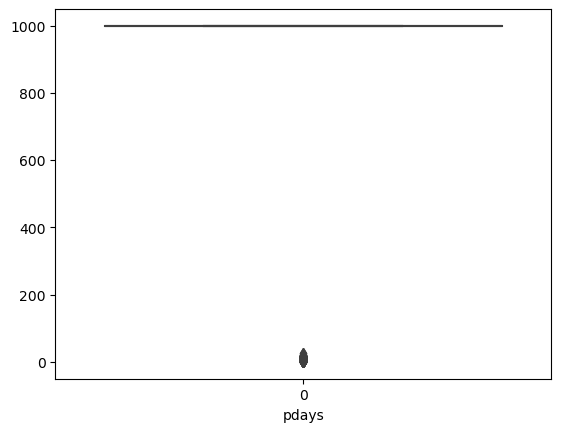

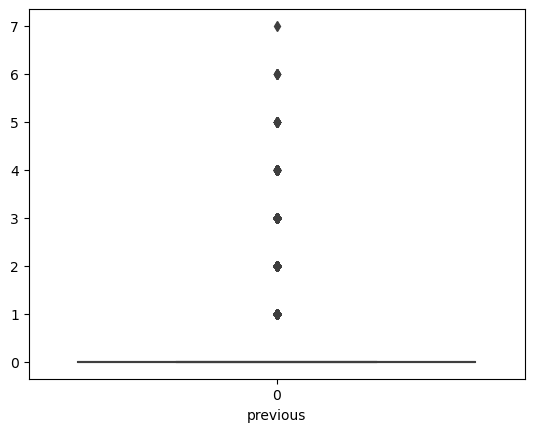

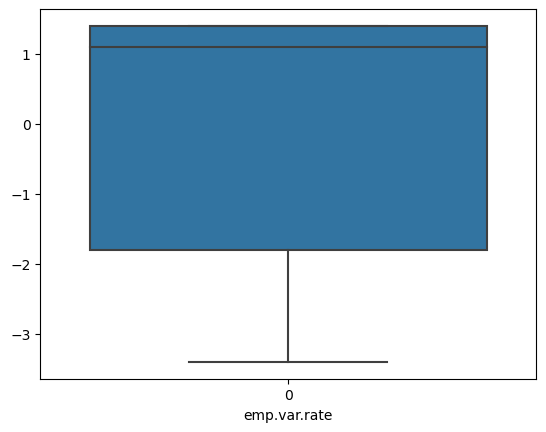

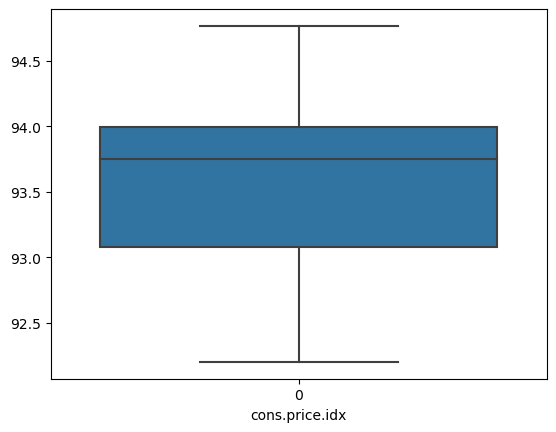

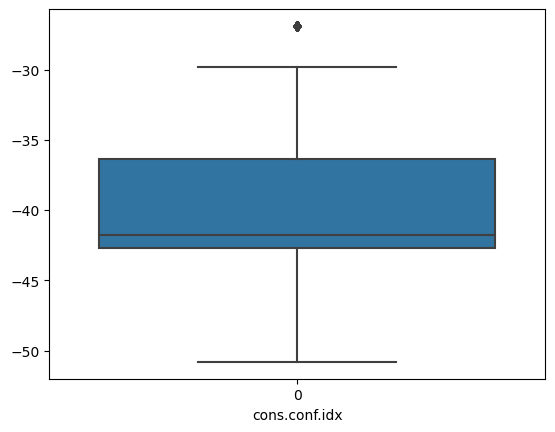

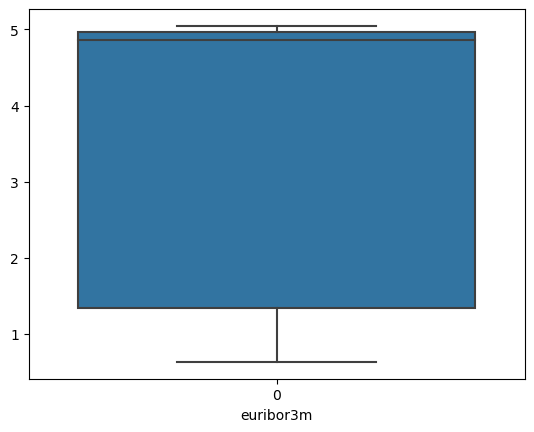

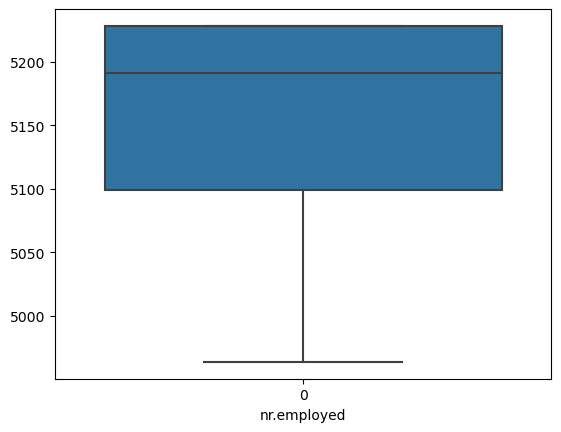

In [9]:
for i in data.columns:   
   if data[i].dtypes != 'object':
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [10]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3-q1
data = data[(data['age']>q1-1.5*iqr) & (data['age']<q3+1.5*iqr)]

In [11]:
data.shape

(40723, 21)

In [12]:
q1 = data['duration'].quantile(0.25)
q3 = data['duration'].quantile(0.75)
iqr = q3-q1
data = data[(data['duration']>q1-1.5*iqr) & (data['duration']<q3+1.5*iqr)]

In [13]:
data.shape

(37788, 21)

In [14]:
q1 = data['campaign'].quantile(0.25)
q3 = data['campaign'].quantile(0.75)
iqr = q3-q1
data = data[(data['campaign']>q1-1.5*iqr) & (data['campaign']<q3+1.5*iqr)]

In [15]:
data.shape

(34638, 21)

In [16]:
q1 = data['cons.conf.idx'].quantile(0.25)
q3 = data['cons.conf.idx'].quantile(0.75)
iqr = q3-q1
data = data[(data['cons.conf.idx']>q1-1.5*iqr) & (data['cons.conf.idx']<q3+1.5*iqr)]

In [17]:
data.shape

(34281, 21)

In [18]:
bins = [0,50,100]
data['age'] = pd.cut(data['age'],bins)

In [19]:
data['age'] = data['age'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34281 entries, 0 to 41197
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34281 non-null  object 
 1   job             34281 non-null  object 
 2   marital         34281 non-null  object 
 3   education       34281 non-null  object 
 4   default         34281 non-null  object 
 5   housing         34281 non-null  object 
 6   loan            34281 non-null  object 
 7   contact         34281 non-null  object 
 8   month           34281 non-null  object 
 9   day_of_week     34281 non-null  object 
 10  duration        34281 non-null  float64
 11  campaign        34281 non-null  float64
 12  pdays           34281 non-null  float64
 13  previous        34281 non-null  float64
 14  poutcome        34281 non-null  object 
 15  emp.var.rate    34281 non-null  float64
 16  cons.price.idx  34281 non-null  float64
 17  cons.conf.idx   34281 non-null 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
for i in data.columns:   
   if data[i].dtypes == 'object':
    data[i] = le.fit_transform(data[i])

<Axes: >

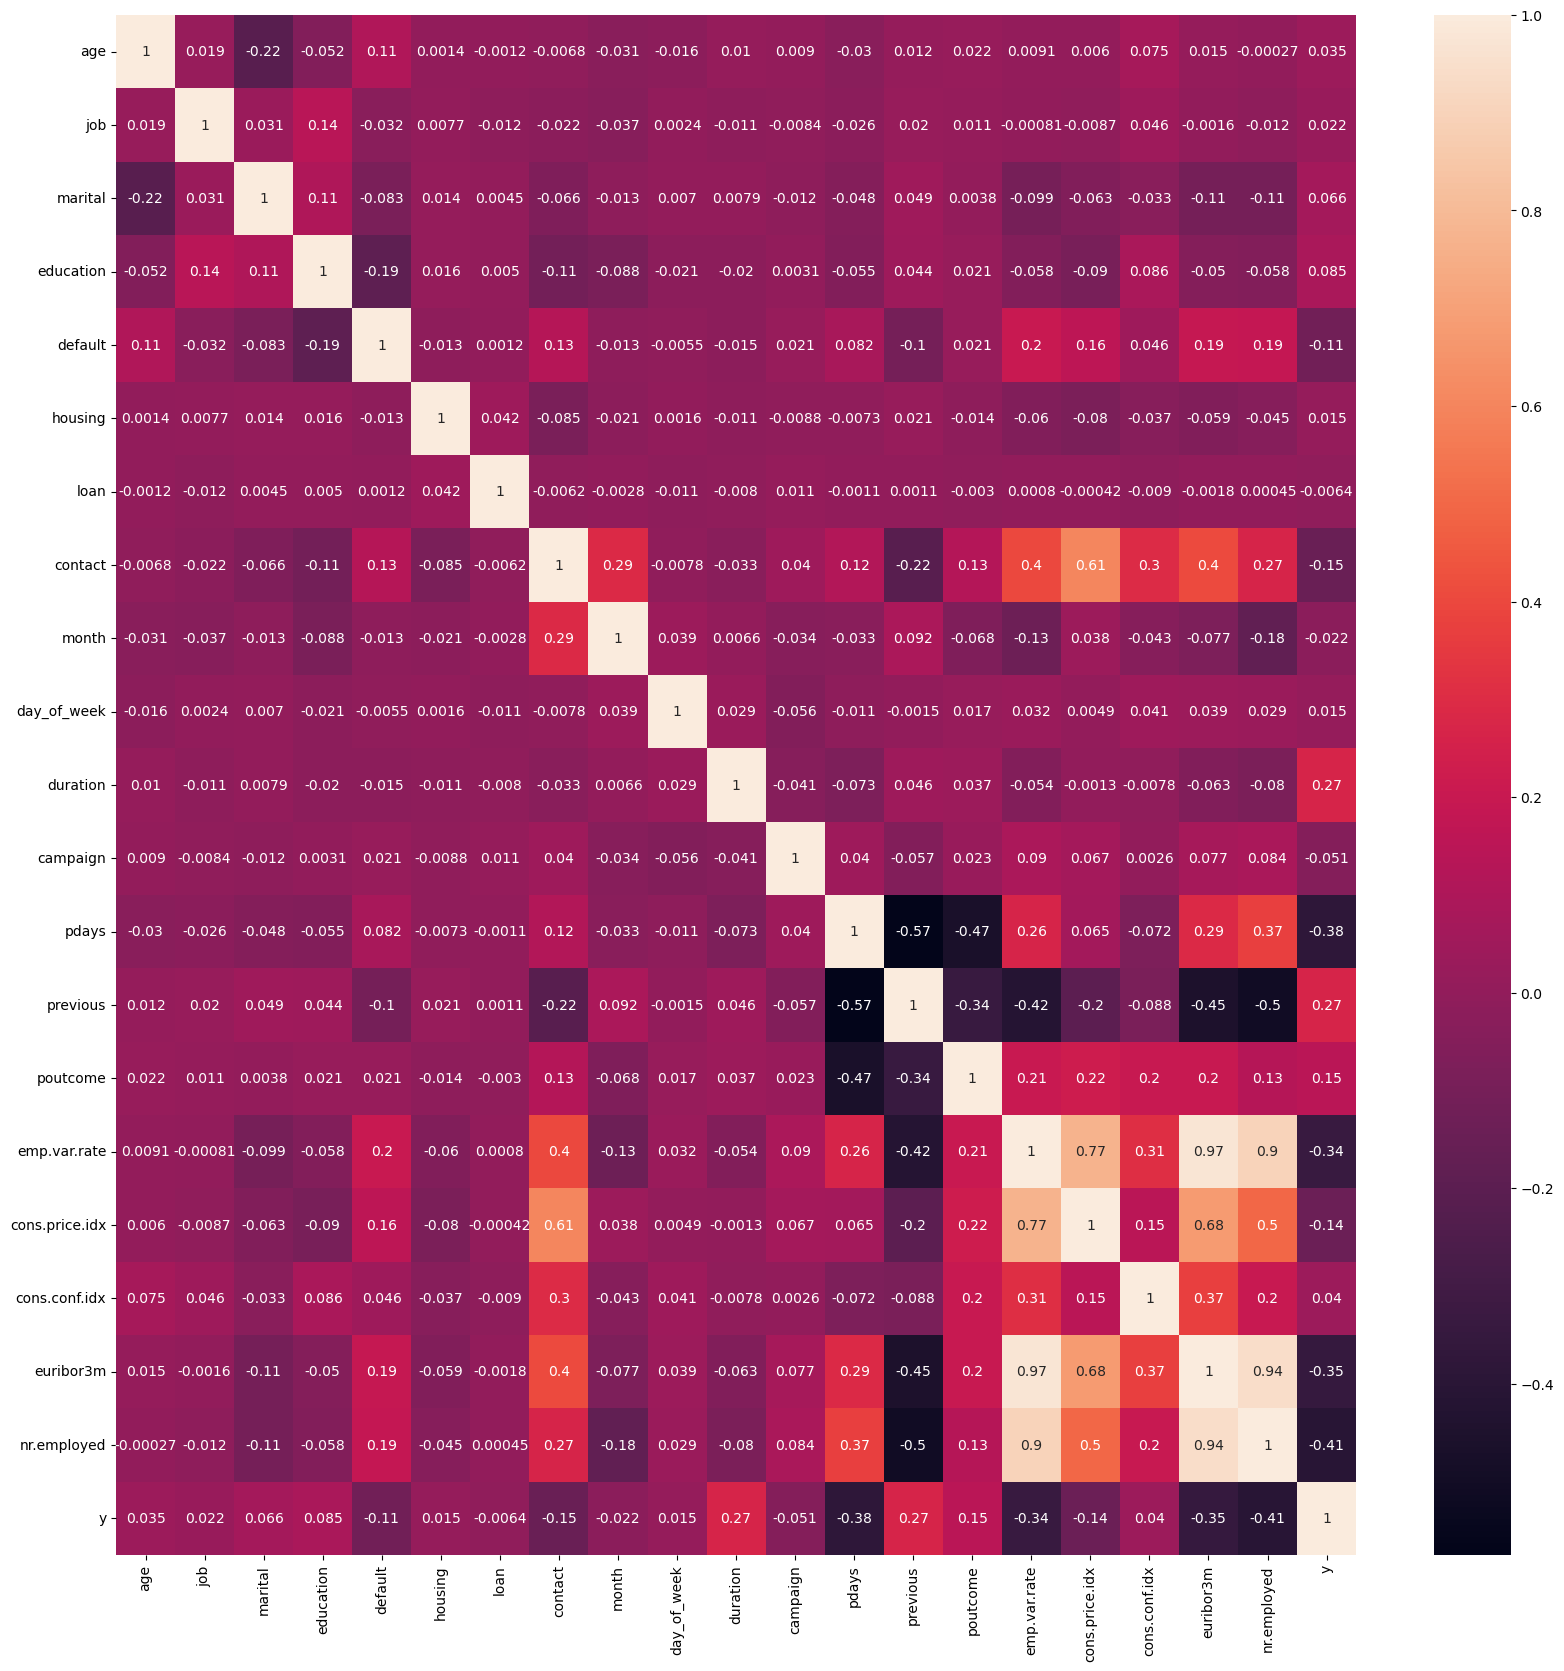

In [23]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
VIF = pd.DataFrame()
VIF['columns'] = data.columns
VIF['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
VIF

,columns,VIF
0,age,1.285273
1,job,2.104818
2,marital,5.109638
3,education,4.563332
4,default,1.388132
5,housing,2.214703
6,loan,1.207653
7,contact,2.977536
8,month,6.756221
9,day_of_week,3.102505


In [26]:
data = data.drop('nr.employed',axis = 1)

In [27]:
VIF = pd.DataFrame()
VIF['columns'] = data.columns
VIF['VIF'] = [variance_inflation_factor(data.values,i) for i in range (len(data.columns))]
VIF

,columns,VIF
0,age,1.283683
1,job,2.104647
2,marital,5.109049
3,education,4.562736
4,default,1.386002
5,housing,2.214363
6,loan,1.207621
7,contact,2.447219
8,month,5.761680
9,day_of_week,3.101310


In [28]:
data = data.drop('cons.price.idx',axis = 1)

In [29]:
VIF = pd.DataFrame()
VIF['columns'] = data.columns
VIF['VIF'] = [variance_inflation_factor(data.values,i) for i in range (len(data.columns))]
VIF

,columns,VIF
0,age,1.278511
1,job,2.099445
2,marital,5.065397
3,education,4.518488
4,default,1.383778
5,housing,2.212619
6,loan,1.206996
7,contact,2.348229
8,month,5.699015
9,day_of_week,3.089160


In [30]:
data = data.drop('pdays',axis = 1)

In [31]:
VIF = pd.DataFrame()
VIF['columns'] = data.columns
VIF['VIF'] = [variance_inflation_factor(data.values,i) for i in range (len(data.columns))]
VIF

,columns,VIF
0,age,1.275139
1,job,2.095759
2,marital,5.022606
3,education,4.466392
4,default,1.381860
5,housing,2.208511
6,loan,1.206846
7,contact,2.266659
8,month,5.619435
9,day_of_week,3.076850


In [32]:
data = data.drop('euribor3m',axis = 1)

In [33]:
VIF = pd.DataFrame()
VIF['columns'] = data.columns
VIF['VIF'] = [variance_inflation_factor(data.values,i) for i in range (len(data.columns))]
VIF

,columns,VIF
0,age,1.259687
1,job,2.087574
2,marital,4.978763
3,education,4.282198
4,default,1.379402
5,housing,2.197585
6,loan,1.206555
7,contact,2.249320
8,month,5.263714
9,day_of_week,3.029439


In [34]:
data = data.drop('cons.conf.idx',axis = 1)

In [35]:
VIF = pd.DataFrame()
VIF['columns'] = data.columns
VIF['VIF'] = [variance_inflation_factor(data.values,i) for i in range (len(data.columns))]
VIF

,columns,VIF
0,age,1.247584
1,job,2.062317
2,marital,4.502176
3,education,4.027617
4,default,1.349223
5,housing,2.122157
6,loan,1.200869
7,contact,2.239601
8,month,4.693128
9,day_of_week,2.895039


In [36]:
data = data.drop('poutcome',axis = 1)

In [37]:
VIF = pd.DataFrame()
VIF['columns'] = data.columns
VIF['VIF'] = [variance_inflation_factor(data.values,i) for i in range (len(data.columns))]
VIF

,columns,VIF
0,age,1.231706
1,job,2.045569
2,marital,4.250395
3,education,3.829849
4,default,1.340859
5,housing,2.091418
6,loan,1.198776
7,contact,2.225517
8,month,4.546931
9,day_of_week,2.815463


In [56]:
x = data.drop('y',axis =1)
y = data['y']

In [57]:
from sklearn.model_selection import train_test_split

In [82]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15, random_state = 42)

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [84]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [85]:
ypred = lr.predict(xtest)

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(ytest,ypred)

array([[4682,   71],
       [ 311,   79]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(ytest,ypred)

0.9257242854365156